<a href="https://colab.research.google.com/github/ismarano/IAEntregable2/blob/master/Entregable2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos seaborn

In [1]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 11.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Importamos el resto de librerias que necesitamos.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles. 
%config InlineBackend.figure_format = 'svg'

Ahora cargamos el dataset

In [3]:
!wget https://raw.githubusercontent.com/ismarano/IAEntregable2/master/train.csv -O train.csv

--2019-04-16 20:01:35--  https://raw.githubusercontent.com/ismarano/IAEntregable2/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19171 (19K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  18.72K  --.-KB/s    in 0.01s   

2019-04-16 20:01:35 (1.54 MB/s) - ‘train.csv’ saved [19171/19171]



Creamos el dataset, y mostramos los datos.

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Prediction
0,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.6,False
1,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.9,True
2,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.6,False
3,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.5,False
4,48,Male,0.7,0.2,326,29,17,8.7,5.5,1.7,False


Mostramos un histograma para ver la distribucion de las variables numericas

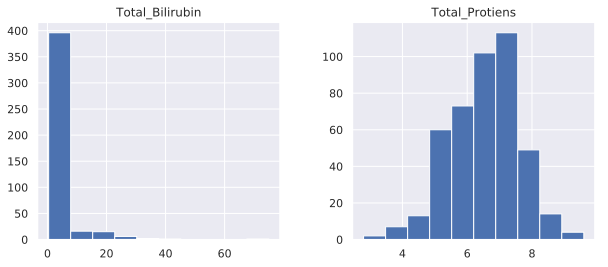

In [5]:
features = ['Total_Bilirubin', 'Total_Protiens']
df[features].hist(figsize=(10, 4));

Mostraremos unos graficos de densidad para las variables anteriores.

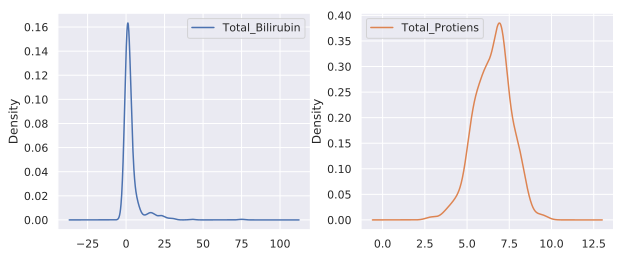

In [6]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

Si queremos mostrar la distribucion de las observaciones  de una variable usamos displot.

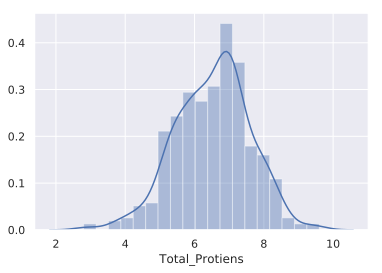

In [7]:
sns.distplot(df['Total_Protiens']);

Tambien podemos mostrarlo usando un grafico de cajas.

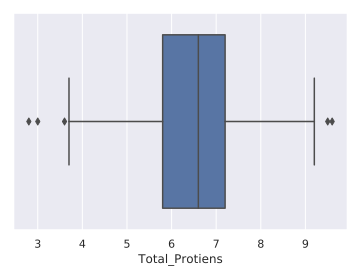

In [8]:
sns.boxplot(x='Total_Protiens', data=df);

Ahora mostraremos tambien un grafico de biolines para la misma variable.

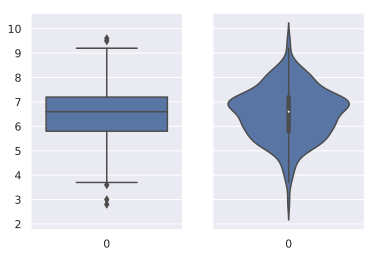

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total_Protiens'], ax=axes[0]);
sns.violinplot(data=df['Total_Protiens'], ax=axes[1]);

Si queremos obtener las estadisticas de los datos usamos describe.

In [10]:
features = ['Total_Bilirubin', 'Total_Protiens']
df[features].describe()

,Total_Bilirubin,Total_Protiens
count,437.000000,437.000000
mean,3.291762,6.524714
std,6.377841,1.069224
min,0.400000,2.800000
25%,0.800000,5.800000
50%,1.000000,6.600000
75%,2.600000,7.200000
max,75.000000,9.600000


Para las variables categoricas queremos usar una tabla de frecuencias, para saber como de frecuentes son las variables.

In [12]:
df['Prediction'].value_counts()

False    310
True     127
Name: Prediction, dtype: int64

Vamos a usar countPlot para dibujar un grafico de barras que nos muestre la distribucion de dos variables categoricas.

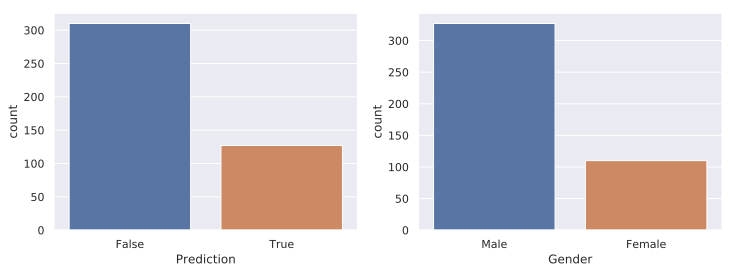

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Prediction', data=df, ax=axes[0]);
sns.countplot(x='Gender', data=df, ax=axes[1]);